In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei'] # 黑体
plt.rcParams['axes.unicode_minus'] = False

## 绽放反应  

### 伤害计算公式  
$$反应基础伤害 * 等级系数 * 反应基础倍率 * (1 + \frac{16*精通}{2000+精通} + 反应伤害提升) * 抗性 * 额外收益$$

- 等级系数：角色等级当然越高越好
- 反应基础倍率：绽放=2,超/烈绽放=3
- 反应伤害提升：如花海四件套效果
- 额外收益：如草神2命带来的暴击期望


### 精通收益与圣遗物  

#### 公式与精通有关的部分  
$$\frac{16*精通}{2000+精通}$$

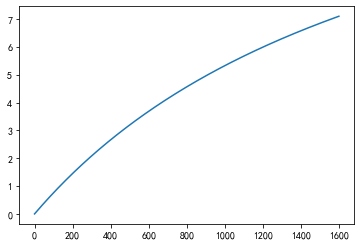

In [20]:
x = np.arange(0, 1600)
plt.plot(x, (16*x)/(2000+x))
plt.show()


因乐园套增加反应伤害,于是带上反应伤害  
$$\frac{16*精通}{2000+精通} + 反应伤害$$
以发射器的圣遗物选择精精精(主词条187*3), 武器(4星武器铁峰刺)精通165为例  
饰金: 二件套+80 四件套+150(每个不同属性队友+50,按全部不同计算)
$$精通 = 165 + 80 + 150 + 187 * 3 + 副词条精通$$
乐园:  
$$精通 = 165 + 80 + 187 * 3 + 副词条精通$$
$$反应伤害 = 0.4 * (1 + 0.25 * n) \quad \forall n\in{0,1,2,3,4}$$
2+2:  
$$精通 = 165 + 80 * 2 + 187 * 3 + 副词条精通$$

#### 副词条精通上下限
| 初始值 | 追加1 | 追加2 | 追加3 | 追加4 | 追加5 | 
| ---- | ---- | ---- | ---- | ---- | ---- |
| 16-19-21-32 | 32-46 | 48-69 | 64-92 | 80-115 | 96-138 | 

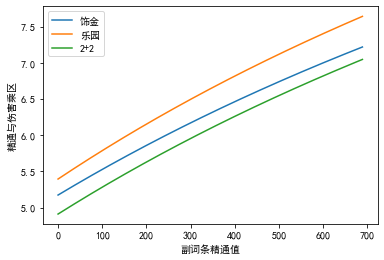

In [21]:
subEM = np.arange(0, 138 * 5)
em1 = 165 + 80 + 150 + 187*3 + subEM
em2 = 165 + 80 + 187*3 + subEM
em3 = 165 + 80*2 + 187*3 + subEM
plt.plot(subEM, (16 * em1)/(2000 + em1), label = '饰金')
plt.plot(subEM, (16 * em2)/(2000 + em2) + 0.8, label = '乐园')
plt.plot(subEM, (16 * em3)/(2000 + em3), label = '2+2')
plt.xlabel('副词条精通值')
plt.ylabel('精通与伤害乘区')
plt.legend()
plt.show()